In [1]:
import numpy as np
import sys
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/stella/')
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/scripts/')
from utils import *
import matplotlib as plt
from scipy.stats import skewnorm

In [14]:
def skewed_gaussian(x,alpha,t0,sigma,A):
    """Creates a skewned Gaussian model transit.
    
    Parameters:
        x: Flux array.
        A: Amplitude of the Gaussian.
        t0: Mean of the Gaussian.
        sigma: Standard deviation of the Gaussian.
        alpha: Skewness parameter (positive for right-skewed, negative for left-skewed).

    Returns:
        y: The value of the skewed Gaussian at each input data point x.
    
    
    """
    pdf = skewnorm.pdf(x, alpha, loc=t0, scale=sigma)
    normalized_pdf = pdf / pdf.max()  # Normalize so the peak is 1
    return 1 - A * normalized_pdf  # Subtract from 1 to create a dip

In [3]:
lc, info = import_lightcurve('../data/eleanor/s0007/hlsp_gsfc-eleanor-lite_tess_ffi_s0007-0000000107091580_tess_v1.0_lc.fits')

In [4]:
import matplotlib.pyplot as plt

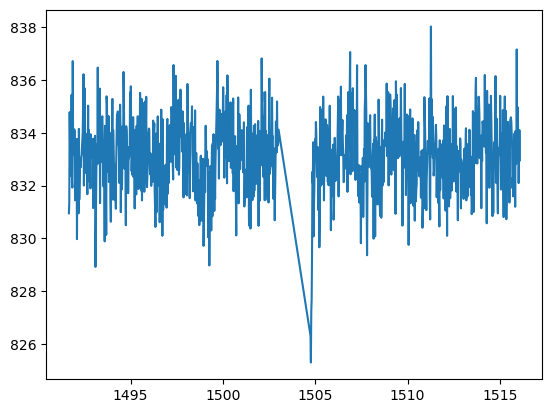

In [5]:
plt.plot(lc['TIME'],lc['PCA_FLUX'])

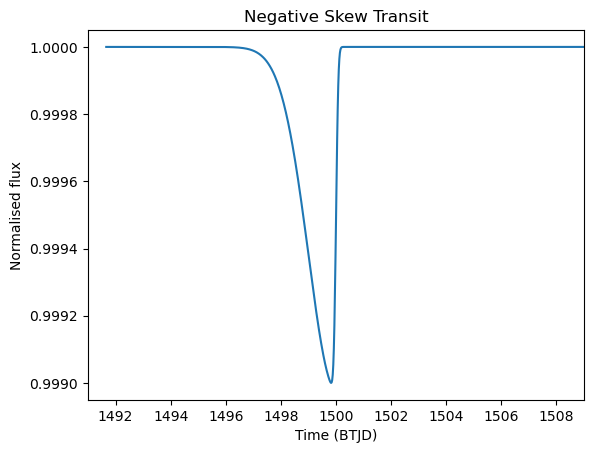

In [36]:
x = np.arange(lc['TIME'][0],lc['TIME'][-1],0.02)
alpha = -15  # Skewness parameter (0 for symmetric)
t0 = 1500     # Mean of the Gaussian
sigma = 1  # Duration
A = 0.001      # Amplitude of the Gaussian

# Generate Gaussian
y = skewed_gaussian(x, alpha, t0, sigma, A)

# Plot
plt.plot(x, y)
#plt.title('Symmetric Gaussian with alpha=0')
# plt.xlabel('x')
# plt.axvline(x[np.argmin(y)],linestyle='--',zorder=1,c='red')
# plt.axvline(x[np.argmin(y)]+2.5)

plt.xlim([1491,1509])
plt.ylabel('Normalised flux')
plt.xlabel('Time (BTJD)')
plt.title('Negative Skew Transit')
plt.savefig('../negative-exocomet.png',dpi=200)
plt.show()